
# Assignment 6.12 - womanium 2024


## Assignment: Advanced Algorithms Design
## _Quantum random walk_
**Instructions - Final assignment**

Follow the example from Bootcamp 4 for creating the quantum walk operator for the case of a circle with 4 nodes, and design the quantum walk operator for the case of a line with 16 nodes:

**Tasks:**

- A. Create a well-detailed Python Jupyter notebook that explains your algorithm, including the code parts covered in class, and pictures/figures where relevant. Utilize the Python code from class: quantum_walk_circle_example.py. It can be found directly also in the Classiq Git Library in the community/womanium/assignments folder. Feel free to extend the example beyond the requirements here and what was covered in class.

- B. Contribute your notebook to the Classiq Git Library to the folder community/womanium/assignments. Follow the contribution guidelines in order to contribute - NO need to open an issue for this, you can directly open a PR. The PR title should be: Womanium Final Assignment - <First Name> <Last Name>. The file name should be in the following format: <first_name>_<last_name>_hw4.ipynb.

In [3]:
from classiq import *

# Implementation

Implementation of a quantum random walk on a circle/one-dimensional line graph with size num_nodes. The core components are:

1. **Initialization**:
    - Setting the number of nodes and the size of the register.

2. **Quantum State Preparation**:
    - The prepare_minus function prepares a quantum state by applying an X gate (bit-flip) followed by a Hadamard gate (superposition) to a qubit x.
    - The diffuzer_oracle function modifies an auxiliary qubit based on whether x is non-zero.
    - The zero_diffuzer function allocates an auxiliary qubit, prepares it in the minus state, and applies the diffuzer_oracle.

3. **W Operator**:
    - The W_iteration function computes probabilities for transitioning between adjacent vertices in a graph.

4. **Edge Oracle**:
    - The edge_oracle function checks whether vertices and adjacent_vertices are adjacent and sets the result in the output qubit res.

5. **Bitwise Swap**:
    - The bitwise_swap function swaps corresponding qubits between two arrays x and y.

6. **S Operator**:
    - The S_operator function applies the edge oracle and swaps qubits if the result is 1.

7. **Main Function**:
    - The main function allocates qubits for vertices and adjacent_vertices.
    - It applies the W operator and S operator sequentially.

In summary, this program simulates a quantum random walk on a graph, where the walker's position is represented by quantum states. 

The W operator updates the probabilities for transitioning between adjacent vertices, and the S operator performs a random step by applying an edge oracle to ensure vertex adjacency and swaps qubits accordingly.


## Common functions for circles or lines

In [4]:

# Prepares the minus state (aux qubit) for the diffuzer oracle
@qfunc
def prepare_minus(x: QBit):
  X(x)
  H(x)

# x: current node
@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
  aux^=(x!=0)

# Zero diffuser using Grover's algorithm technique
# x: current node 
@qfunc
def zero_diffuzer(x: QNum):
  aux = QNum('aux')
  allocate(1,aux)
  within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)

# non-zero probabilities for allowable transitions
# @qfunc
# def W_iteration

# Iterates over all possible positions and applies 
# the W_iteration for each position.
@qfunc 
def W_operator(vertices:QNum, adjacent_vertices: QNum):
    for i in range(num_nodes):
      W_iteration(i,vertices,adjacent_vertices)

# Edge oracle for checking adjacency of 2 vertices
#
#@qfunc
#def edge_oracle

# Swaps the contents of two quantum registers: moves the walker
@qfunc 
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
  repeat(count= x.len,
    iteration= lambda i: SWAP(x[i],y[i]))

# shift operator moving the walker if vertices adjacent
@qfunc 
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))


## Circle-specific functions

Here we have the function W_iteration with the probability of 0.5 going in either direction.

What is special about a random walk on a circle is that the node (0) and the node (num_nodes-1) are adjacent. This fact is taken care of in the function edge_oracle.

In [5]:

# non-zero probabilities for allowable transitions
def W_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    prob = [0] * num_nodes
    prob[(i+1)% num_nodes]=0.5
    prob[(i-1)% num_nodes]=0.5
    print(f'State={i}, prob vec ={prob}')
    
    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: 
                inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: 
                zero_diffuzer(adjacent_vertices)))
    
# Edge oracle for checking adjacency of two vertices 
@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
  diff = vertices - adjacent_vertices
  mod = diff%num_nodes
  res |= (mod == 1) | (mod == num_nodes-1)


## Circle with 4 nodes

In [6]:
# Circle with 4 Nodes 

# Size of the register required for the number of nodes
size = 2
num_nodes = 2**size


In [7]:
# Main quantum walk operator function
# applies the W and S operators after initializing
# vertices
@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size,vertices)
  hadamard_transform(vertices)
  allocate(size,adjacent_vertices)

  W_operator(vertices,adjacent_vertices)
  S_operator(vertices,adjacent_vertices)

In [8]:
qmod = create_model(main)
qprog = synthesize(qmod)
#show(qprog)

State=0, prob vec =[0, 0.5, 0, 0.5]
State=1, prob vec =[0.5, 0, 0.5, 0]
State=2, prob vec =[0, 0.5, 0, 0.5]
State=3, prob vec =[0.5, 0, 0.5, 0]


In [32]:
write_qmod(qmod,"random4")

## Circle with 8 nodes

In [9]:
# Circle with 8 Nodes 

# Size of the register required for the number of nodes
size = 3
num_nodes = 8


In [10]:
# Main quantum walk operator function
@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size,vertices)
  hadamard_transform(vertices)
  allocate(size,adjacent_vertices)

  W_operator(vertices,adjacent_vertices)
  S_operator(vertices,adjacent_vertices)

In [11]:
qmod = create_model(main)
qprog = synthesize(qmod)
#show(qprog)

State=0, prob vec =[0, 0.5, 0, 0, 0, 0, 0, 0.5]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5]
State=7, prob vec =[0.5, 0, 0, 0, 0, 0, 0.5, 0]


## Circle with 16 nodes

In [12]:
# Circle with 16 Nodes 

# Size of the register required for the number of nodes
size = 4
num_nodes = 16


In [13]:
# Main quantum walk function
@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size,vertices)
  hadamard_transform(vertices)
  allocate(size,adjacent_vertices)

  W_operator(vertices,adjacent_vertices)
  S_operator(vertices,adjacent_vertices)

In [14]:
qmod = create_model(main)
qprog = synthesize(qmod)
#show(qprog)

State=0, prob vec =[0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5,

## Line-specific functions
The function W_iteration defines the transition probabilities for a line. At the beginning and at the end of the line the walker can go only in one direction (probability = 1). For all other nodes the probability going in either direction is 0.5.

Here the function edge_oracle just has to check whether the vertices are adjacent (distance = 1).

In [15]:

# non-zero probabilities for allowable probabilities
def W_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    prob = [0] * (num_nodes)
    if i == 0:
        prob[i + 1] = 1.0
    elif i == (num_nodes) -1:
        prob[i - 1] = 1.0
    else:
        prob[i - 1] = 0.5
        prob[i + 1] = 0.5
    print(f'State={i}, prob vec ={prob}')
    
    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: 
                inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: 
                zero_diffuzer(adjacent_vertices)))


# Edge oracle for checking adjacency of two vertices
@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
  diff = vertices - adjacent_vertices
  res |= (diff == 1) | (diff == -1)


## Line with 4 nodes

In [16]:
# Line with 4 Nodes

# Register size to accomodate the number of vertices
size = 2
num_nodes = 2**size


In [17]:
# Main quantum walk function
@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size,vertices)
  hadamard_transform(vertices)
  allocate(size,adjacent_vertices)

  W_operator(vertices,adjacent_vertices)
  S_operator(vertices,adjacent_vertices)

In [18]:
qmod = create_model(main)
qprog = synthesize(qmod)
#show(qprog)

State=0, prob vec =[0, 1.0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0]
State=2, prob vec =[0, 0.5, 0, 0.5]
State=3, prob vec =[0, 0, 1.0, 0]


In [29]:
write_qmod(qmod,"random4")

## Line with 8 nodes

In [19]:
# Line with 8 Nodes

# Register size to accomodate the number of vertices
size = 3
num_nodes = 2**size


In [20]:
# Main quantum walk function
@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size,vertices)
  hadamard_transform(vertices)
  allocate(size,adjacent_vertices)

  W_operator(vertices,adjacent_vertices)
  S_operator(vertices,adjacent_vertices)

In [21]:
qmod = create_model(main)
qprog = synthesize(qmod)
#show(qprog)

State=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 1.0, 0]


## Line with 16 nodes

In [22]:
# Line with 16 Nodes

# Register size to accomodate the number of vertices
size = 4
num_nodes = 2**size


In [23]:
# Main quantum walk function
@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size,vertices)
  hadamard_transform(vertices)
  allocate(size,adjacent_vertices)

  W_operator(vertices,adjacent_vertices)
  S_operator(vertices,adjacent_vertices)

In [24]:
qmod = create_model(main)
qprog = synthesize(qmod)
#show(qprog)

State=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0

# Results

## Number of qubits vs. nodes

| random walk | num_nodes | transpiled qubits |
| :- | :-: | :-: |
| circle | 4  | 13 |
| circle | 8 | 22|
| circle | 16 | 33 |
| line | 4 | 17 |
| line | 8 | 25 |
| line | 16 | 37 |

Here we see that the more nodes we have, the more transpiled qubits are going to be used. Lines need more qubits than circles.

## Circle 4 nodes

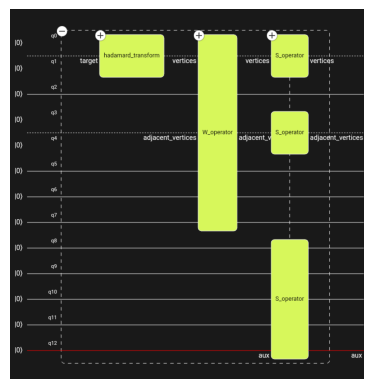

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('circle4.png')
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

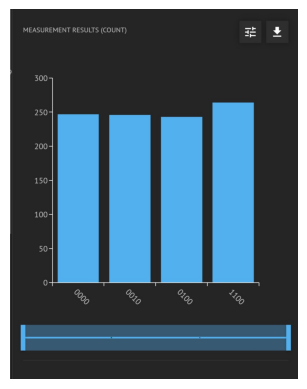

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('circle4hist.jpg')
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

## Line 8 nodes

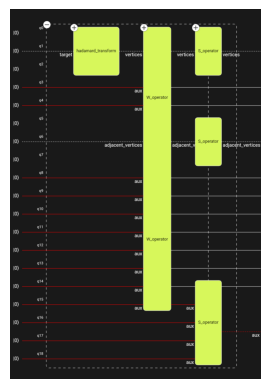

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('line8.png')
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

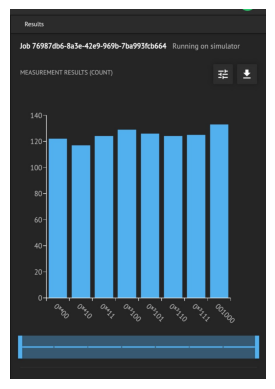

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('line8hist.jpg')
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

## Line 16 nodes
![alt text](line16.png)

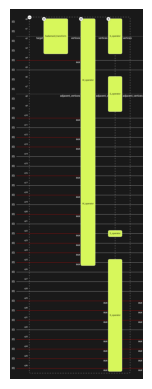

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('line16.png')
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()